# Summary

In [1]:
import pandas as pd
import os
import pathlib


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path)
DATASET_FILES = [
    "linear_regression/linear_regression_basic_results.json",
    "linear_regression/linear_regression_second_results.json",
    "linear_regression/linear_regression_final_results.json",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
results_linear_regression = [pd.read_json(result) for result in DATASET_PATHS]
results_linear_regression = pd.concat(
    results_linear_regression, join="outer", axis=0
).reset_index(drop=True)

results_linear_regression.insert(0, "Model type", "Linear regression")

In [2]:
import pandas as pd
import os
import pathlib


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path)
DATASET_FILES = [
    "random_forest/random_forest_basic_results.json",
    "random_forest/random_forest_second_results.json",
    "random_forest/random_forest_final_results.json",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
results_random_forest = [pd.read_json(result) for result in DATASET_PATHS]
results_random_forest = pd.concat(
    results_random_forest, join="outer", axis=0
).reset_index(drop=True)

results_random_forest.insert(0, "Model type", "Random forest")

In [3]:
import pandas as pd
import os
import pathlib


current_path = os.getcwd()
DATASETS_DIR = pathlib.Path(current_path)
DATASET_FILES = [
    "lightgbm/lightgbm_basic_results.json",
    "lightgbm/lightgbm_second_results.json",
    "lightgbm/lightgbm_final_results.json",
]
DATASET_PATHS = [f"{DATASETS_DIR}/{file}" for file in DATASET_FILES]
results_lightgbm = [pd.read_json(result) for result in DATASET_PATHS]
results_lightgbm = pd.concat(results_lightgbm, join="outer", axis=0).reset_index(
    drop=True
)

results_lightgbm.insert(0, "Model type", "LightGBM")

In [4]:
results = pd.concat(
    [results_linear_regression, results_random_forest, results_lightgbm], axis=0
).reset_index(drop=True)

## All tested models results

In [5]:
results

,Model type,Split type,Tuning type,Number of characteristics,MSE,RMSE,MAE
0,Linear regression,chronological,normal,8,0.898038,0.947648,0.673958
1,Linear regression,random,normal,8,0.679964,0.824599,0.538489
2,Linear regression,chronological,Ridge,8,0.914811,0.956457,0.677980
3,Linear regression,chronological,Lasso,8,0.909914,0.953894,0.677665
4,Linear regression,random,Ridge,8,0.680736,0.825067,0.538193
5,Linear regression,random,Lasso,8,0.678174,0.823513,0.535896
6,Linear regression,chronological,normal,13,0.353475,0.594538,0.438196
7,Linear regression,random,normal,13,0.325684,0.570687,0.382039
8,Linear regression,chronological,Ridge,13,0.361328,0.601106,0.441633
9,Linear regression,chronological,Lasso,13,0.354146,0.595102,0.435859


In [6]:
results = results[
    results["Tuning type"].isin(["normal", "Ridge", "minimise_overfitting", "Optuna"])
].reset_index(drop=True)
results["Tuning type"] = results["Tuning type"].replace(
    ["Ridge", "minimise_overfitting", "Optuna"], "tuned"
)

In [7]:
import sys

import os
import pathlib

sys.path.append("../..")
from training.results import plot_summary_all_models

## MAE

### Random split

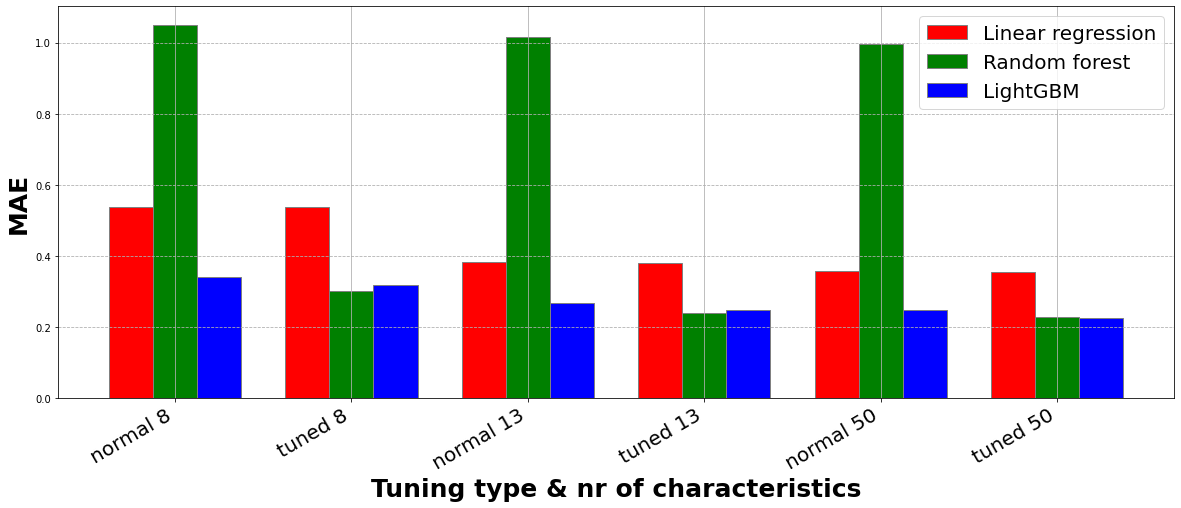

In [8]:
plot_summary_all_models(results, "random", "MAE")

#### Not tuned

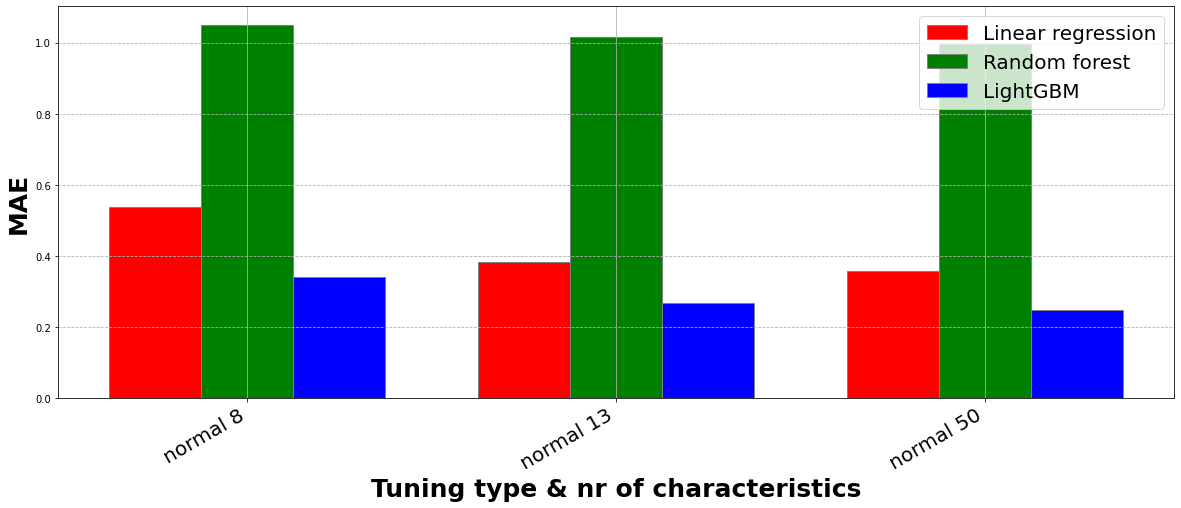

In [9]:
plot_summary_all_models(results[results["Tuning type"] == "normal"], "random", "MAE")

#### Tuned

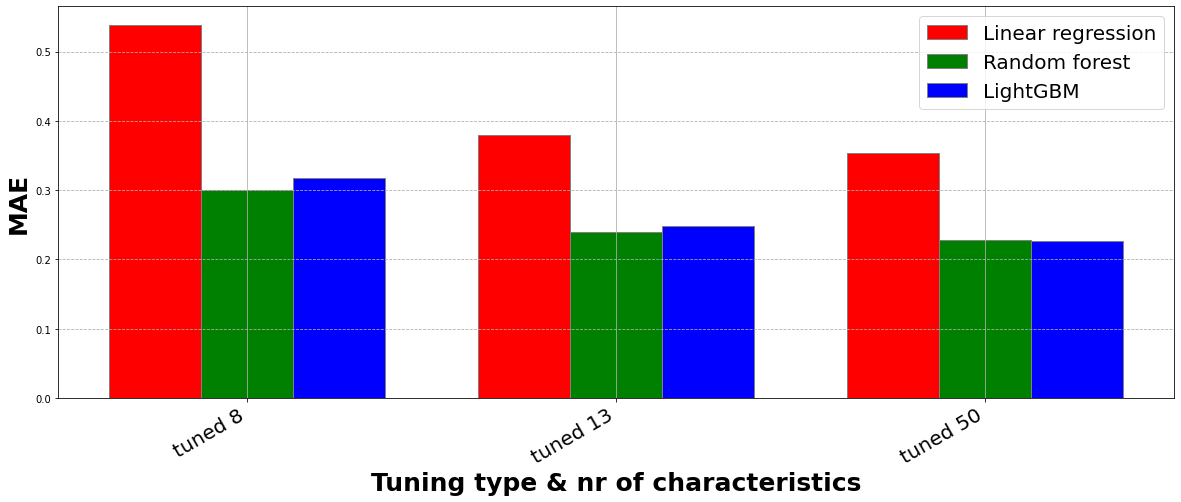

In [10]:
plot_summary_all_models(results[results["Tuning type"] == "tuned"], "random", "MAE")

### Chronological split

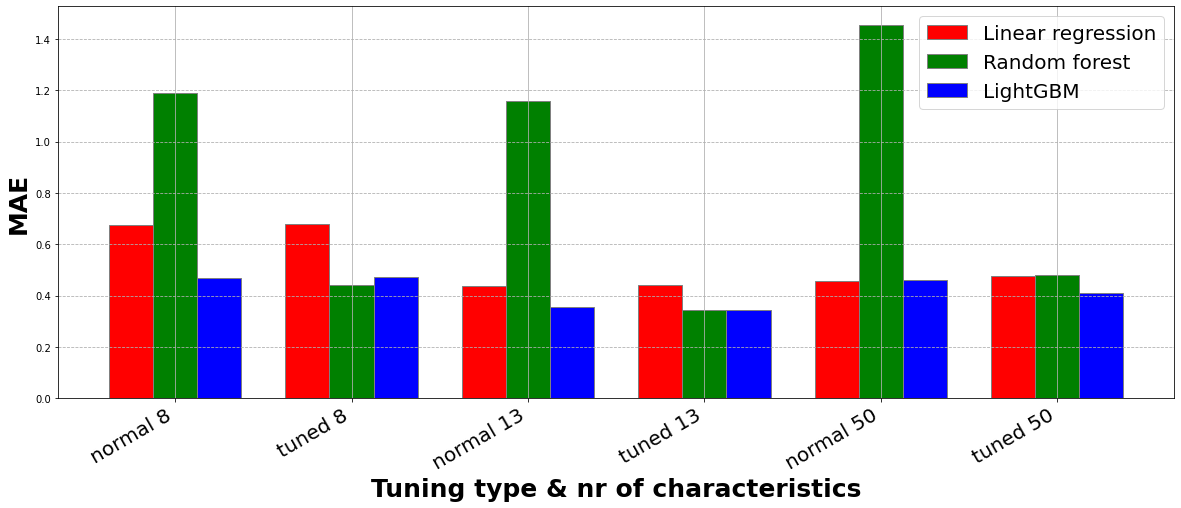

In [11]:
plot_summary_all_models(results, "chronological", "MAE")

#### Not tuned

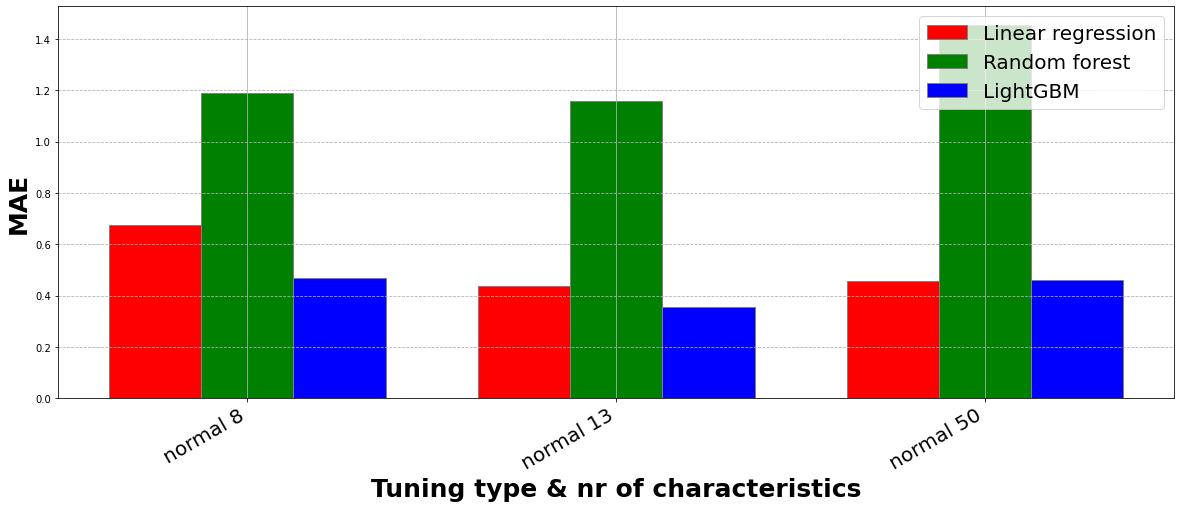

In [12]:
plot_summary_all_models(
    results[results["Tuning type"] == "normal"], "chronological", "MAE"
)

#### Tuned

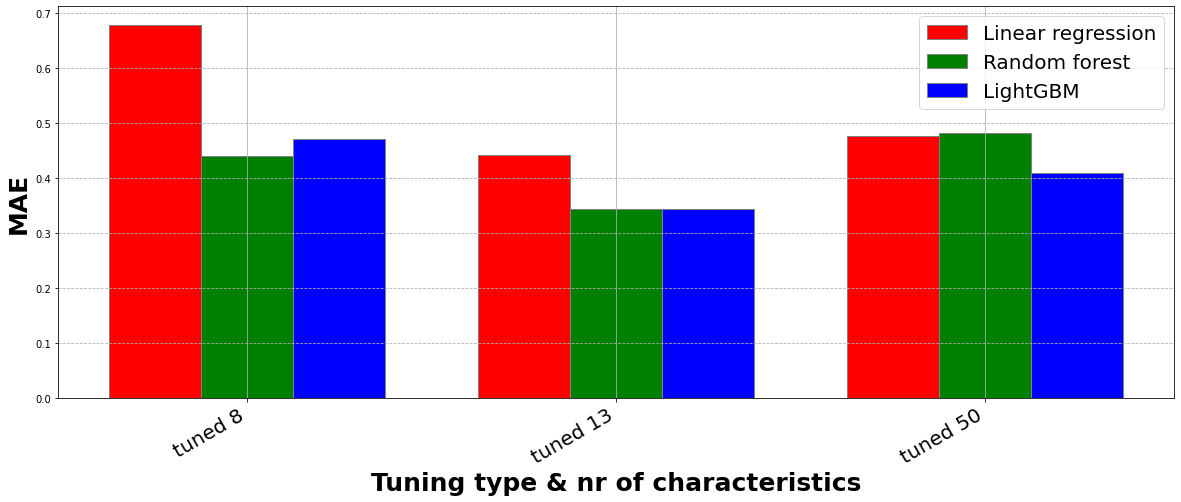

In [13]:
plot_summary_all_models(
    results[results["Tuning type"] == "tuned"], "chronological", "MAE"
)

## RMSE

### Random split

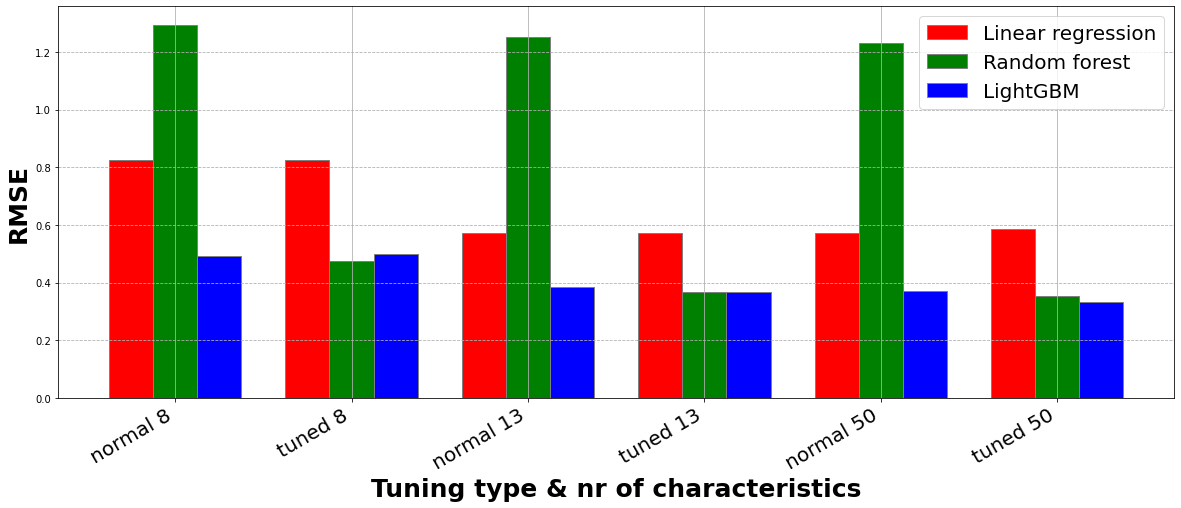

In [14]:
plot_summary_all_models(results, "random", "RMSE")

#### Not tuned

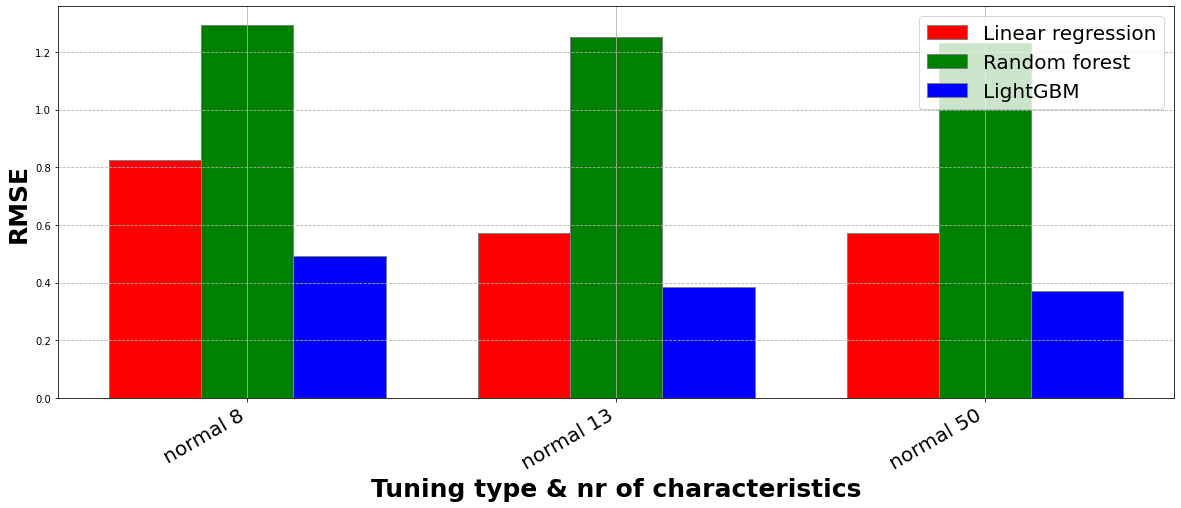

In [15]:
plot_summary_all_models(results[results["Tuning type"] == "normal"], "random", "RMSE")

#### Tuned

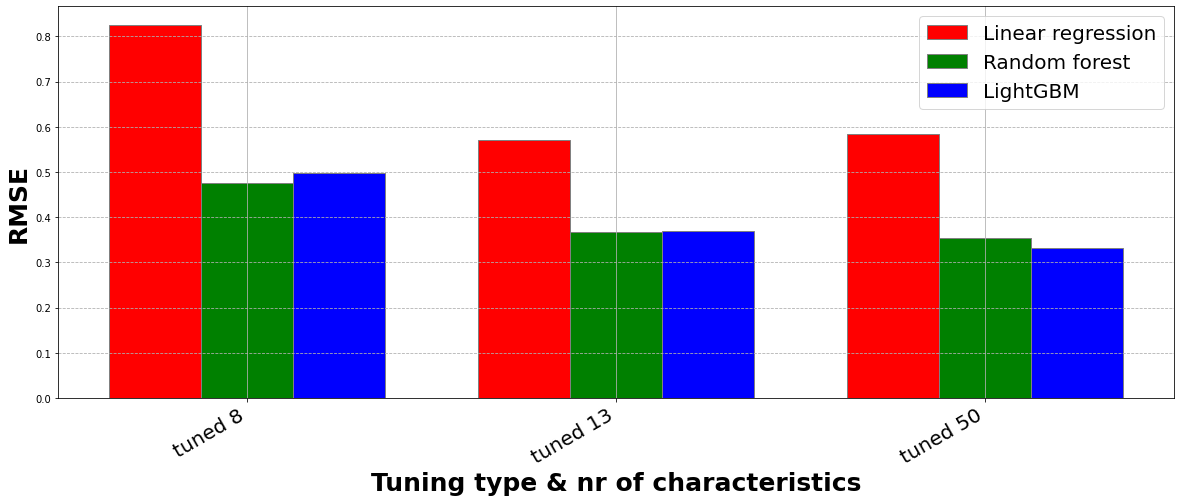

In [16]:
plot_summary_all_models(results[results["Tuning type"] == "tuned"], "random", "RMSE")

### Chronological split

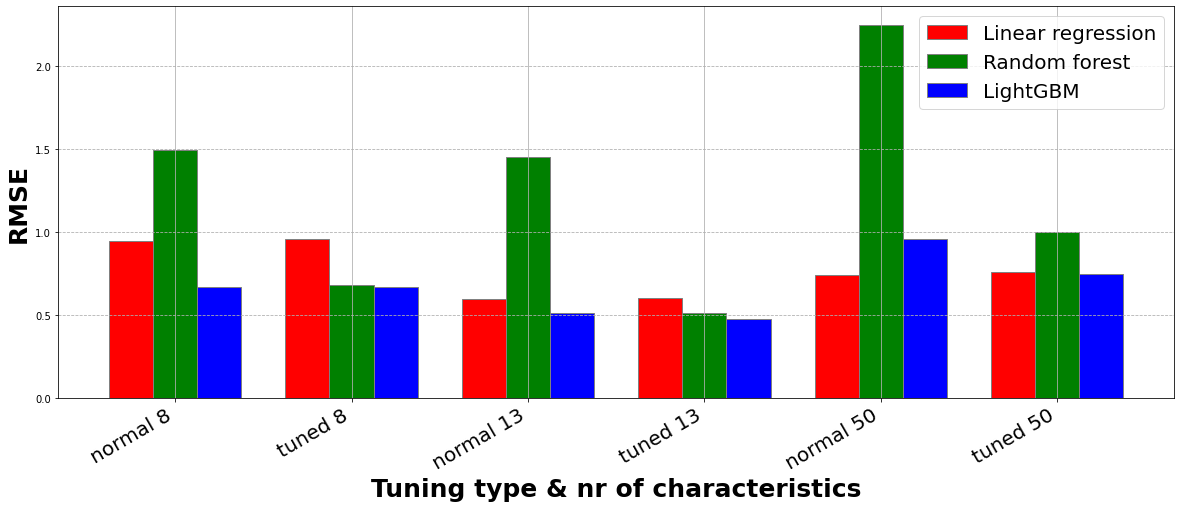

In [17]:
plot_summary_all_models(results, "chronological", "RMSE")

#### Not tuned

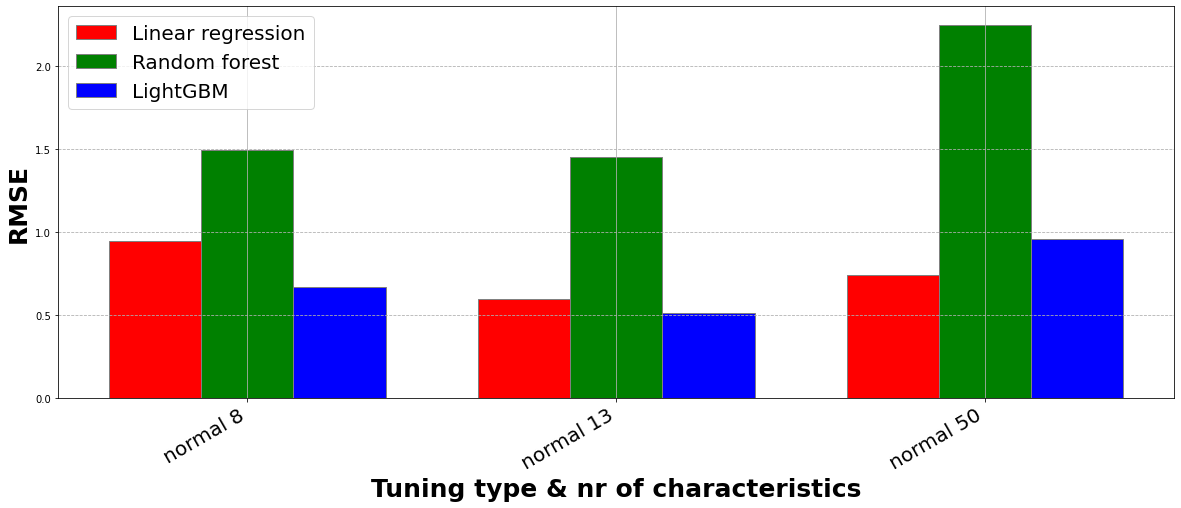

In [18]:
plot_summary_all_models(
    results[results["Tuning type"] == "normal"], "chronological", "RMSE"
)

#### Tuned

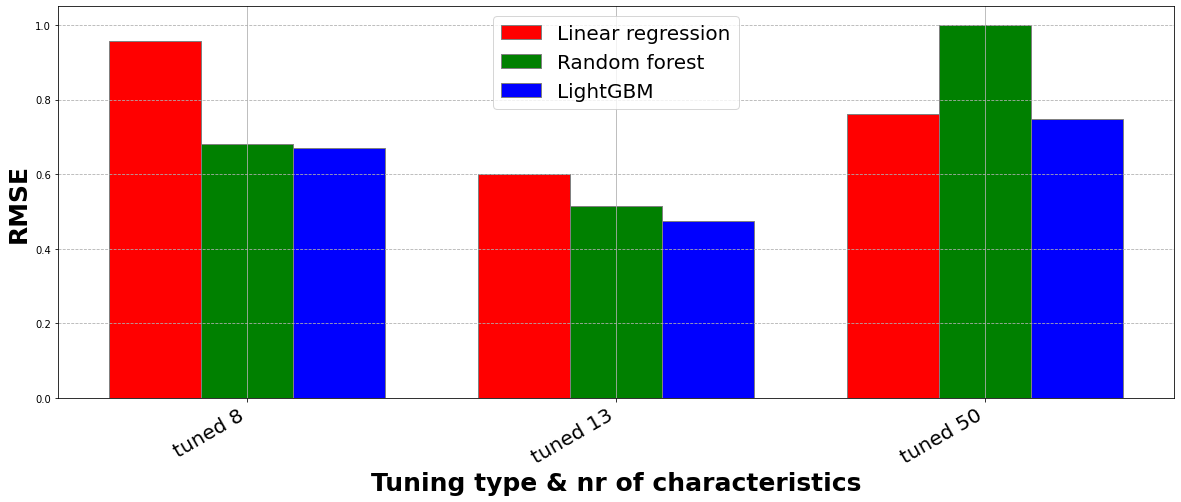

In [19]:
plot_summary_all_models(
    results[results["Tuning type"] == "tuned"], "chronological", "RMSE"
)